In [ ]:
# Example Script to explore sample specific quality filtering

# Example Data:
# Hepatocellular carcinoma (HCC) resection specimens
# Publication link: https://pubmed.ncbi.nlm.nih.gov/37723590/
# Visium Spatial Gene Expression (10× Genomics) - Data
# Depth: 50,000 reads per spot (minimum of ~ 250 millions per sample) at the NovaSeq (Illumina)

# This is Just an example Script to explore the Data Quality of 1 Sample (HCC1R) at a Time to Get:
    # Number of mitochondrial genes
    # Total counts (in each spot)
    # Total genes  (in each spot)
    # Total fraction of highly variable genes (in each spot)
# And Fitler out the Cells and Genes based on these Metrices
# Finally; 
    # Normalize; tranform and find Highly Variable Genes
    # PCA, Find Neighbours, UMAP and then Clustering
    # Calculate marker genes same as single Cell
    # Visualize marker gene expression in Spatially ressolved images

# ** Optional Taks - 
    # Is to create a combined adata object for all samples doing similar Steps. (Quality filtering for each sample should be done indivisually)


# By: Ashok K. Sharma
# Date: 11-22-2024

In [7]:
# Load Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from umap import UMAP # this is installed by us
from sklearn.cluster import KMeans # For Clustering
import scanpy as sc

import warnings
warnings.filterwarnings("ignore")

In [61]:
# Use read_visium function
adata = sc.read_visium("GSE238264_RAW/HCC1R")
adata.var_names_make_unique ()
adata # Check number of cells * number of genes

AnnData object with n_obs × n_vars = 3006 × 36601
    obs: 'in_tissue', 'array_row', 'array_col'
    var: 'gene_ids', 'feature_types', 'genome'
    uns: 'spatial'
    obsm: 'spatial'

In [65]:
# Images are generally saved in the unstructed data (under define path)
# You can save your own image (even if it is not visium) in to adata object; and read it as a object then load in numpy array

adata.uns['spatial']['1541']['images']['hires'].shape

(1991, 2000, 3)

In [66]:
# In obs Spatial dictionary: we have arrange in which each row correspond to the quardinants of the barcode
adata.obsm['spatial'].shape

(3006, 2)

In [67]:
adata.obs

in_tissue  array_row  array_col
AAACAAGTATCTCCCA-1          1         50        102
AAACACCAATAACTGC-1          1         59         19
AAACAGCTTTCAGAAG-1          1         43          9
AAACAGGGTCTATATT-1          1         47         13
AAACATGGTGAGAGGA-1          1         62          0
...                       ...        ...        ...
TTGTTCAGTGTGCTAC-1          1         24         64
TTGTTGTGTGTCAAGA-1          1         31         77
TTGTTTCACATCCAGG-1          1         58         42
TTGTTTCATTAGTCTA-1          1         60         30
TTGTTTCCATACAACT-1          1         45         27

[3006 rows x 3 columns]

In [68]:
adata.obs['thing'] = 'a' # Add Dummy Variable to the Obs

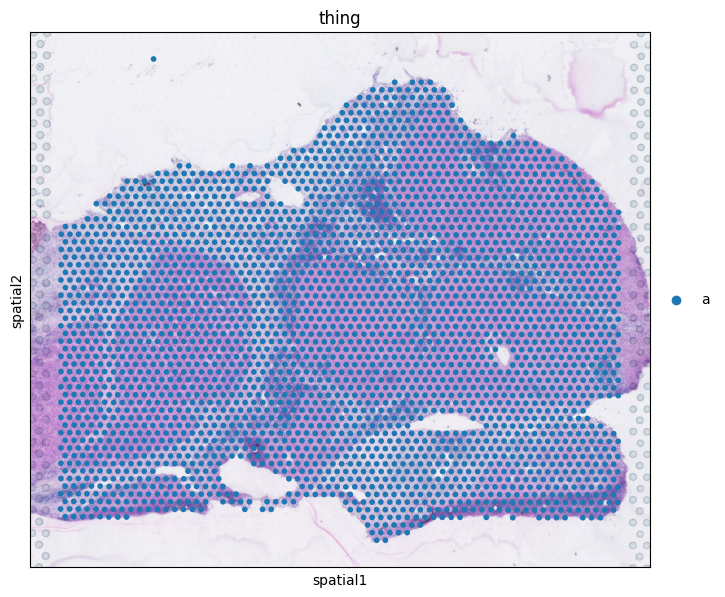

In [69]:
# Just to cehck each blue dot correspond to 3006 cells
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, color = 'thing')

In [70]:
# Pre-Processing is Similar to Regular single Cell RNA seq data Processing
# However this dataset is already filtered
adata.var["mt"] = adata.var_names.str.startswith("MT-") # Check MT if it Mt or mt
sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace = True) # For QC matric calculation

In [71]:
# Check the obs again what else is added
adata.obs

in_tissue  array_row  array_col thing  n_genes_by_counts  \
AAACAAGTATCTCCCA-1          1         50        102     a                671   
AAACACCAATAACTGC-1          1         59         19     a               4263   
AAACAGCTTTCAGAAG-1          1         43          9     a               2935   
AAACAGGGTCTATATT-1          1         47         13     a               3409   
AAACATGGTGAGAGGA-1          1         62          0     a               1944   
...                       ...        ...        ...   ...                ...   
TTGTTCAGTGTGCTAC-1          1         24         64     a                862   
TTGTTGTGTGTCAAGA-1          1         31         77     a               1257   
TTGTTTCACATCCAGG-1          1         58         42     a               1509   
TTGTTTCATTAGTCTA-1          1         60         30     a               1241   
TTGTTTCCATACAACT-1          1         45         27     a               2593   

                    log1p_n_genes_by_counts  total_counts  log1p_total_counts  \
AAACAAGTATCTCCCA-1                 6.510258        1243.0            7.126087   
AAACACCAATAACTGC-1                 8.357963       17918.0            9.793617   
AAACAGCTTTCAGAAG-1                 7.984803        9400.0            9.148571   
AAACAGGGTCTATATT-1                 8.134468       12852.0            9.461332   
AAACATGGTGAGAGGA-1                 7.573017        4916.0            8.500454   
...                                     ...           ...                 ...   
TTGTTCAGTGTGCTAC-1                 6.760415        1641.0            7.403670   
TTGTTGTGTGTCAAGA-1                 7.137278        2577.0            7.854769   
TTGTTTCACATCCAGG-1                 7.319865        3395.0            8.130354   
TTGTTTCATTAGTCTA-1                 7.124478        2365.0            7.768956   
TTGTTTCCATACAACT-1                 7.860956        7558.0            8.930494   

                    pct_counts_in_top_50_genes  pct_counts_in_top_100_genes  \
AAACAAGTATCTCCCA-1                   36.283186                    47.626710   
AAACACCAATAACTGC-1                   30.924210                    41.706664   
AAACAGCTTTCAGAAG-1                   30.851064                    41.276596   
AAACAGGGTCTATATT-1                   33.162154                    44.273265   
AAACATGGTGAGAGGA-1                   28.925956                    40.500407   
...                                        ...                          ...   
TTGTTCAGTGTGCTAC-1                   31.322364                    43.327239   
TTGTTGTGTGTCAAGA-1                   31.703531                    42.413659   
TTGTTTCACATCCAGG-1                   31.075110                    42.268041   
TTGTTTCATTAGTCTA-1                   27.441860                    38.477801   
TTGTTTCCATACAACT-1                   30.272559                    41.055835   

                    pct_counts_in_top_200_genes  pct_counts_in_top_500_genes  \
AAACAAGTATCTCCCA-1                    62.107804                    86.242961   
AAACACCAATAACTGC-1                    53.460208                    66.597835   
AAACAGCTTTCAGAAG-1                    52.840426                    66.882979   
AAACAGGGTCTATATT-1                    55.399938                    68.643013   
AAACATGGTGAGAGGA-1                    52.807160                    68.551668   
...                                         ...                          ...   
TTGTTCAGTGTGCTAC-1                    57.404022                    77.940280   
TTGTTGTGTGTCAAGA-1                    53.977493                    70.624757   
TTGTTTCACATCCAGG-1                    54.285714                    70.279823   
TTGTTTCATTAGTCTA-1                    51.162791                    68.668076   
TTGTTTCCATACAACT-1                    52.752051                    67.425245   

                    total_counts_mt  log1p_total_counts_mt  pct_counts_mt  
AAACAAGTATCTCCCA-1             38.0               3.663562       3.057120  
AAACACCAATAACTGC-1      

<Axes: xlabel='n_genes_by_counts'>

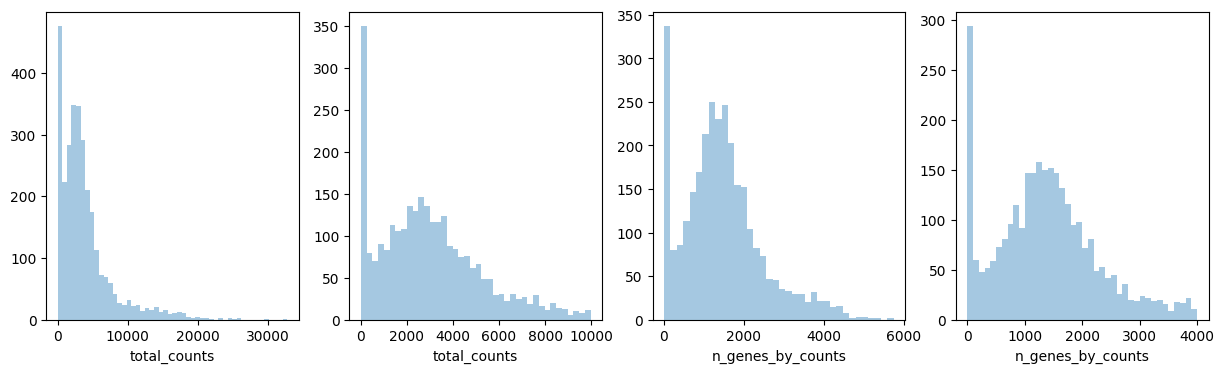

In [72]:
# Plot these QC Matrices
fig, axs = plt.subplots(1, 4, figsize=(15, 4))
sns.distplot(adata.obs["total_counts"], kde=False, ax=axs[0])
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 10000], kde=False, bins=40, ax=axs[1])
sns.distplot(adata.obs["n_genes_by_counts"], kde=False, ax=axs[2])
sns.distplot(adata.obs["n_genes_by_counts"][adata.obs["n_genes_by_counts"] < 4000], kde=False, bins=40, ax=axs[3])

<Axes: xlabel='total_counts'>

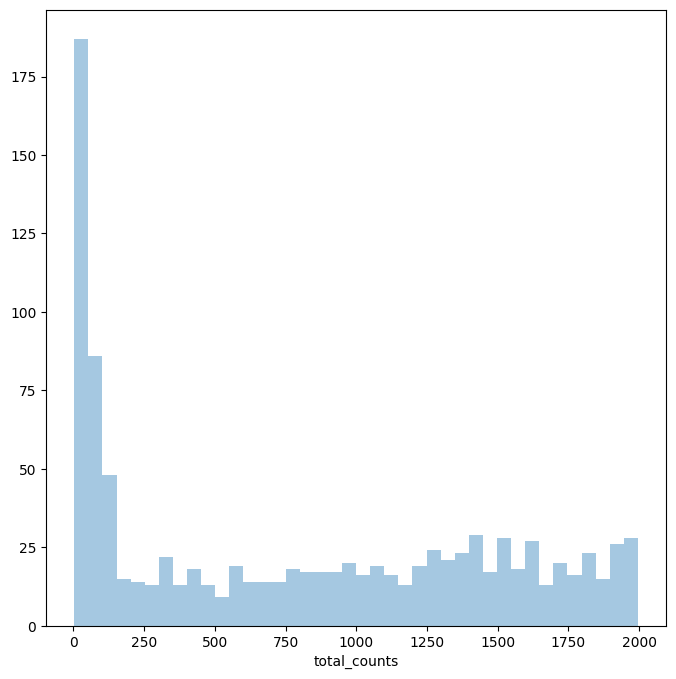

In [73]:
# Check the specific areas
sns.distplot(adata.obs["total_counts"][adata.obs["total_counts"] < 2000], kde=False, bins=40)

In [74]:
# Filter Cells; This depends on the data and filter conditions needs to be changed accrodingly
sc.pp.filter_cells(adata, min_counts = 1000)
sc.pp.filter_cells(adata, max_counts = 35000)

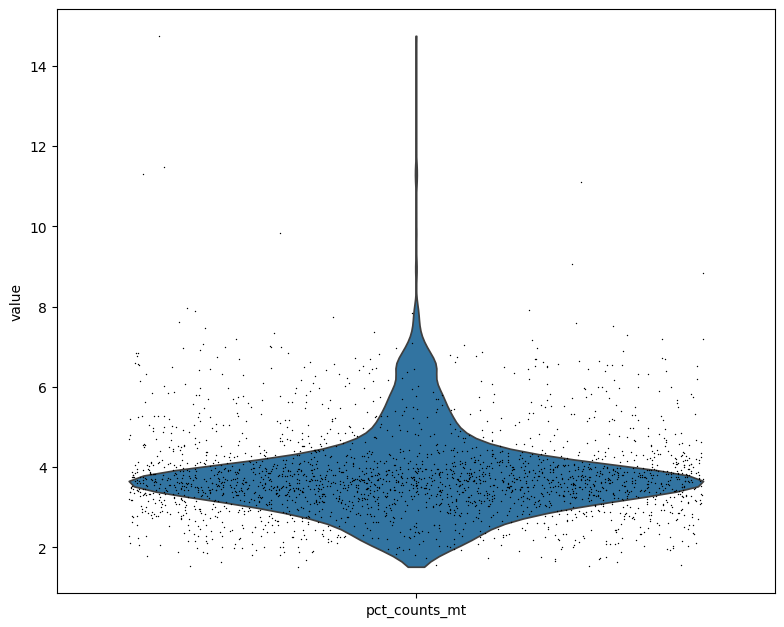

In [75]:
sc.pl.violin(adata, ['pct_counts_mt'], jitter =0.4)

In [76]:
# This looks like already filtered data so let's do mitochondrial filtering at 10
adata = adata[adata.obs["pct_counts_mt"] < 10]
sc.pp.filter_genes(adata, min_cells =3)

In [78]:
# Now check the Number opf Cell * Genes Again after filtering
adata

AnnData object with n_obs × n_vars = 2414 × 17756
    obs: 'in_tissue', 'array_row', 'array_col', 'thing', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts'
    var: 'gene_ids', 'feature_types', 'genome', 'mt', 'n_cells_by_counts', 'mean_counts', 'log1p_mean_counts', 'pct_dropout_by_counts', 'total_counts', 'log1p_total_counts', 'n_cells'
    uns: 'spatial', 'thing_colors'
    obsm: 'spatial'

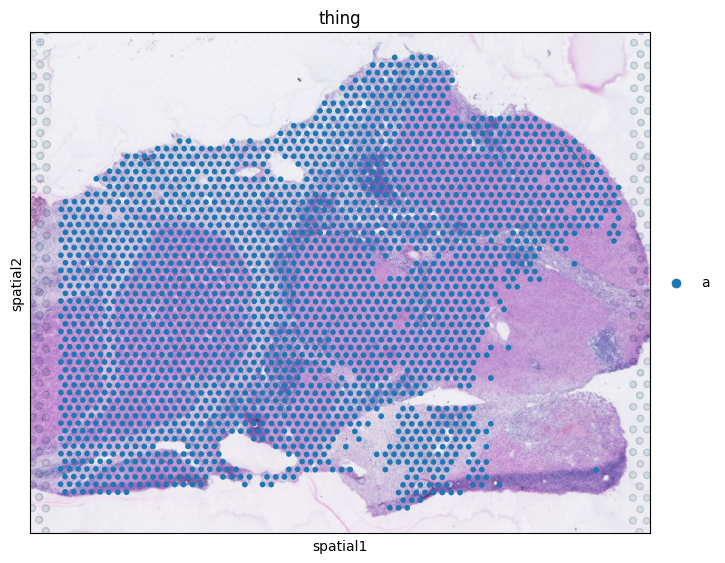

In [79]:
# Check the region where most of the cell are filtered - dead cell or sequencing artifacts
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, color = 'thing')

In [80]:
# Normalize; tranform and find Highly Variable Genes
sc.pp.normalize_total(adata, inplace=True)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)

In [81]:
# Calculate PCA, Find Neighbours, UMAP and then Clustering
sc.pp.pca(adata)
sc.pp.neighbors(adata)
sc.tl.umap(adata)
sc.tl.leiden(adata)

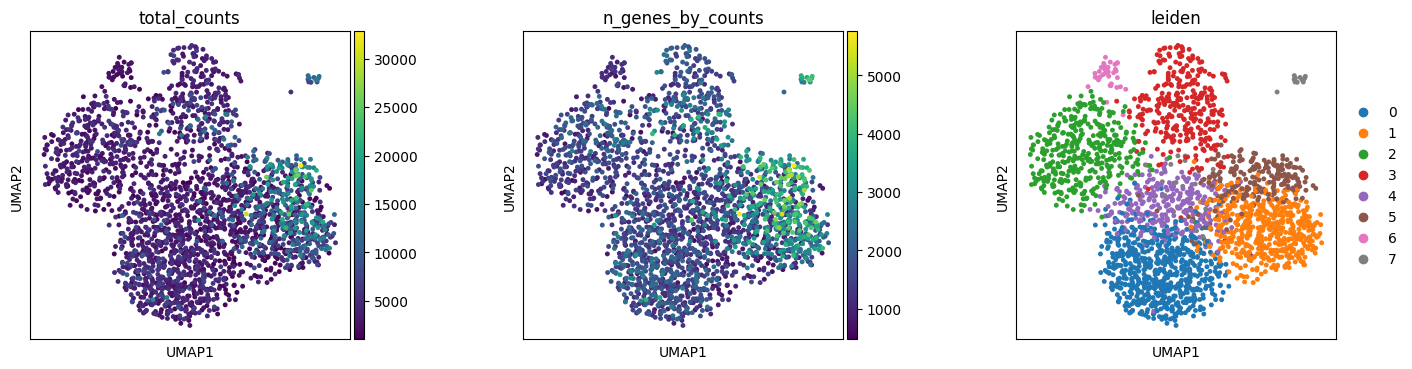

In [82]:
# Plot UMAPS by total_counts and number of genes by cell Types, and then by clustering
plt.rcParams["figure.figsize"] = (4, 4)
sc.pl.umap(adata, color=["total_counts", "n_genes_by_counts", "leiden"], wspace=0.4)

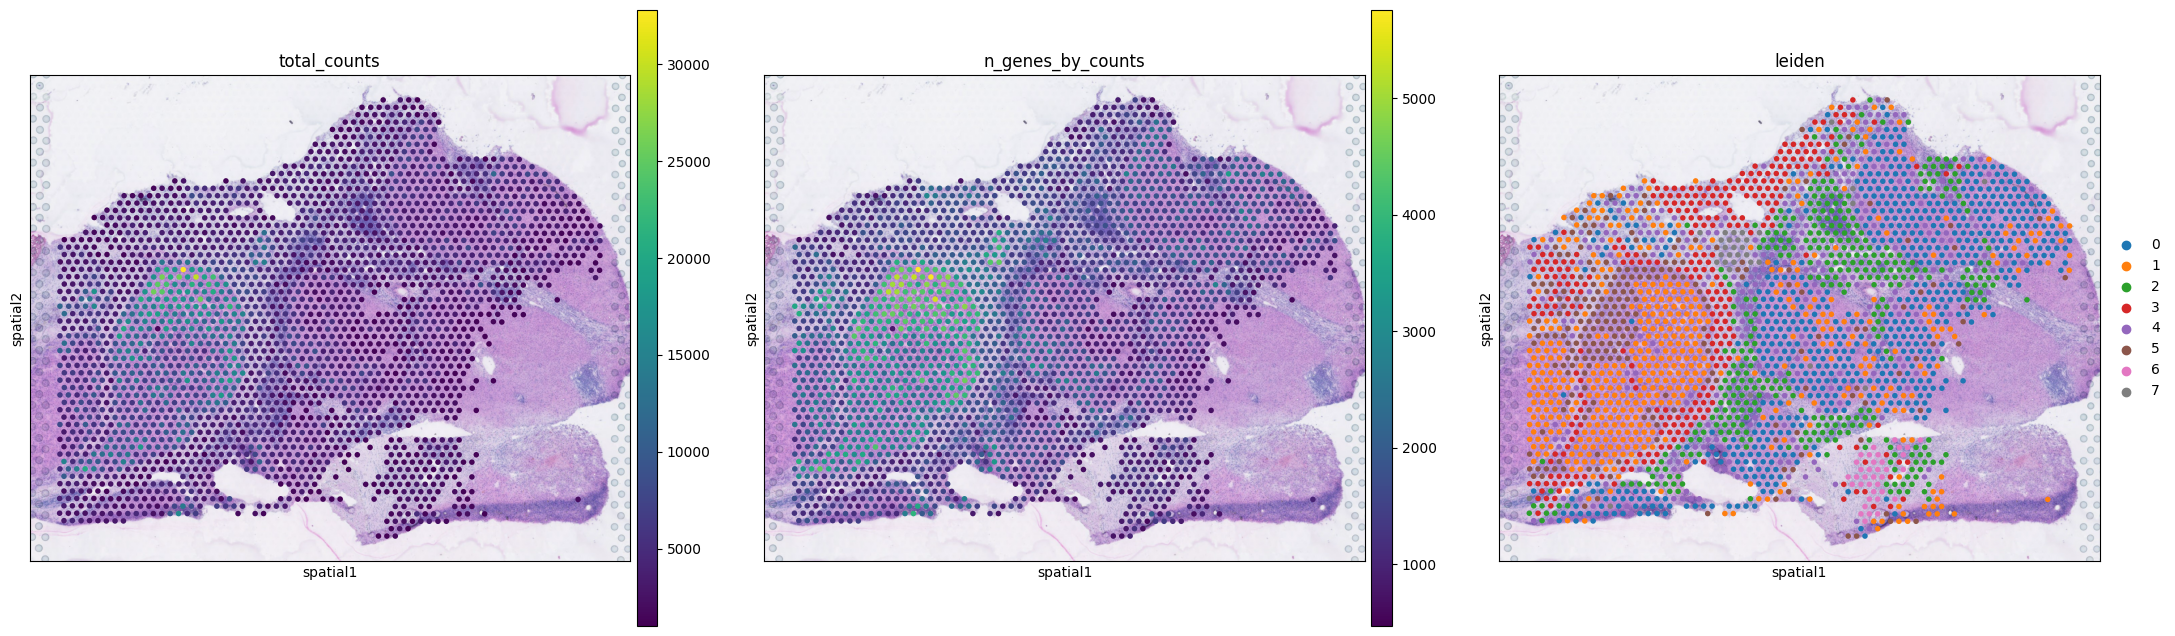

In [83]:
# Spatial visualization to check where these higher counts can be seen
plt.rcParams["figure.figsize"] = (8, 8)
sc.pl.spatial(adata, img_key="hires", color=["total_counts", "n_genes_by_counts", "leiden"])

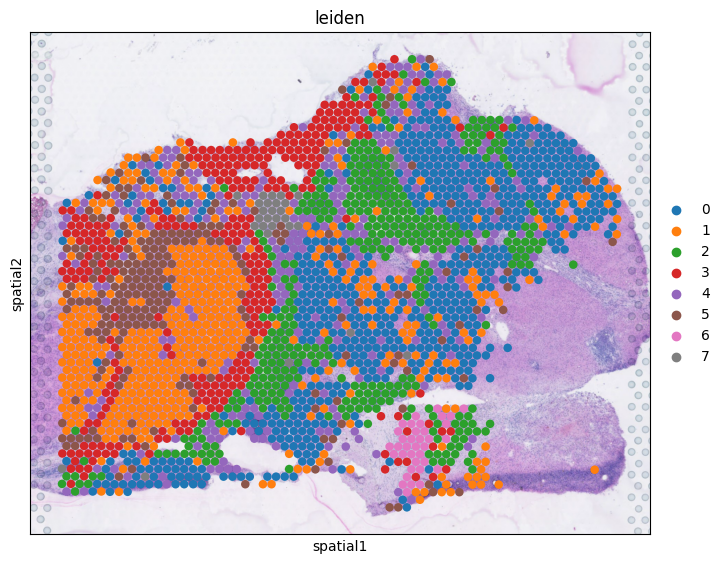

In [84]:
# Visualize cluster in spatial context
sc.pl.spatial(adata, img_key="hires", color="leiden", size=1.5)

In [85]:
# Calculate marker genes same as single Cell
sc.tl.rank_genes_groups(adata, groupby="leiden", method="wilcoxon")

In [54]:
# Save the Marker Genes Output in a Data Frame:
results = adata.uns['rank_genes_groups']
('0', '1', '2', '3', '4')

out = np. array ([[0,0,0,0,0]])
for group in results['names'].dtype.names:
    out = np. vstack( (out, np.vstack((results['names'][group],
                                        results['scores'][group],
                                        results['pvals_adj'] [group],
                                        results['logfoldchanges'] [group],
                                        np. array( [group] * len(results ['names'] [group])) .astype ('object' ))) .T))

markers = pd. DataFrame(out[1:], columns = ['Gene', 'scores', 'pval_adj', 'lfc', 'cluster'])
markers = markers[ (markers.pval_adj < 0.05) & (abs(markers.lfc) > 1)]

In [57]:
# Check cluster specific marker
markers[markers.cluster == '2']

Gene     scores pval_adj       lfc cluster
35516    IGKC   25.64842      0.0  1.634454       2
35517   IGHG3  24.638992      0.0  1.467234       2
35518   IGHG1  22.530245      0.0  1.308583       2
35519    CD74  20.743793      0.0  1.043978       2
35520  IGFBP7  19.377407      0.0  1.142445       2
...       ...        ...      ...       ...     ...
53209     GGH -10.783986      0.0 -1.004727       2
53215  UGT2B4  -11.48055      0.0 -1.081229       2
53221  IGFBP2 -12.200012      0.0 -1.018516       2
53222   MGST1 -12.317342      0.0 -1.052728       2
53248      TF -16.336933      0.0 -1.060911       2

[84 rows x 5 columns]

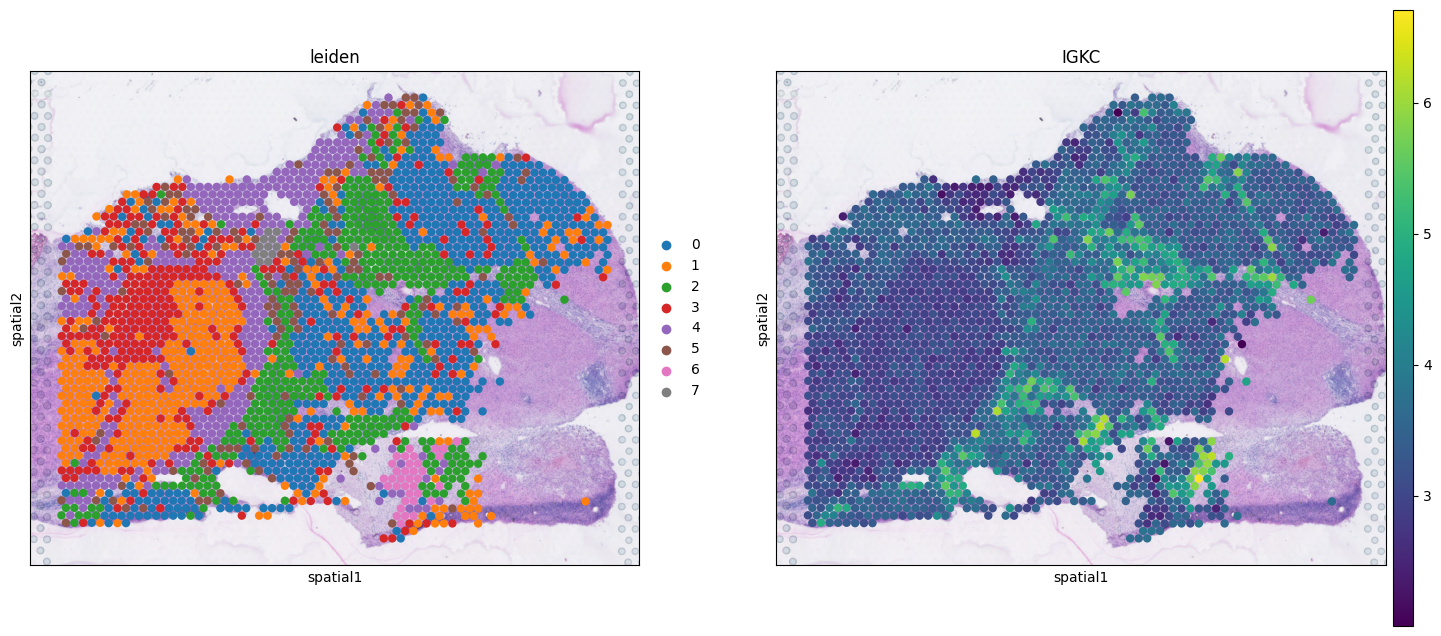

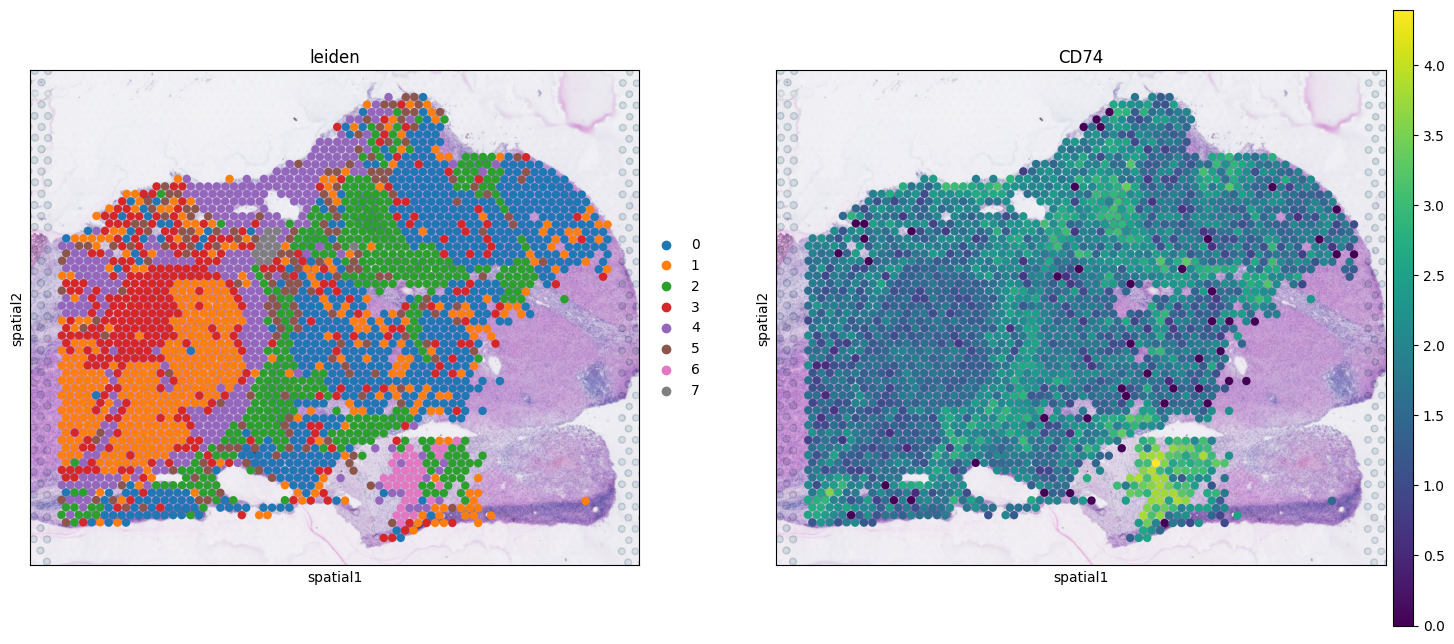

In [59]:
# Try to plot markers on Spatially ressolved Image
sc.pl.spatial(adata, img_key="hires", color=["leiden", "IGKC"], size=1.5)
sc.pl.spatial(adata, img_key="hires", color=["leiden", "CD74"], size=1.5)

In [ ]:
# This is tutorial just to check the gene expression in specific reasons using spatially ressolved images. Check which areas has minimum 
# and maximum expression of certain markers! Or even total counts are higher and lower in specific regions.

In [110]:
# Use Filtering and Check how the number of Cells * Genes will Change for Downstream Analysis for each sample:
# Its highly recommeneded to do these steps for each sample seperately and then combine Filtered Dataset
# For detailed script "ST_Complete_Tutorial_AKS.ipynb" we already started from Filtered dataset; Therefore we did not repeat these filtering

In [115]:
# Example - Loop is to:
# Do Quality filtering By removing
    # Cell and Genes
# Finally Combine All Samples Together

import scanpy as sc
import anndata as ad

# List of sample names and paths
sample_names = ["HCC1R", "HCC5NR", "HCC6NR", "HCC2R", "HCC7NR", "HCC3R", "HCC4R"]
file_paths = [f"GSE238264_RAW/{name}" for name in sample_names]

# Initialize an empty list to store filtered AnnData objects
filtered_adatas = []

for sample, path in zip(sample_names, file_paths):
    # Read sample
    adata = sc.read_visium(path)
    adata.var_names_make_unique()

    # Get mitochondril count and QC matrices
    adata.var["mt"] = adata.var_names.str.startswith("MT-") # Check MT if it Mt or mt
    sc.pp.calculate_qc_metrics(adata, qc_vars=["mt"], inplace = True) # For QC matric calculation

    # Perform filtering
    sc.pp.filter_cells(adata, min_counts=1000)
    sc.pp.filter_cells(adata, max_counts=35000)
    adata = adata[adata.obs["pct_counts_mt"] < 10]
    sc.pp.filter_genes(adata, min_cells=3)

    # Add sample name to metadata
    adata.obs["sample"] = sample

    # Append to the list
    filtered_adatas.append(adata)

# Combine all filtered samples
combined_adata = ad.concat(filtered_adatas, axis=0, merge="same")

# Print combined AnnData dimensions
print(combined_adata)

# Optional: Save combined AnnData for later use
#combined_adata.write("filtered_combined_samples.h5ad")

AnnData object with n_obs × n_vars = 10734 × 12058
    obs: 'in_tissue', 'array_row', 'array_col', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_50_genes', 'pct_counts_in_top_100_genes', 'pct_counts_in_top_200_genes', 'pct_counts_in_top_500_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'n_counts', 'sample'
    var: 'gene_ids', 'feature_types', 'genome', 'mt'
    obsm: 'spatial'
